# Logistic Regression  

**linear regressions** create a line that has a bias and a weight for each variable.  
$$
y = b_0 + b_0 x
$$

**logistic regressions** are binary classifiers, meaning yes or no.  Calculate a probability, and if the probability is high enough, then we predict that yes, it is in that category.  

Simplified:
$$
P = \frac{e^{f(x)}}{1 + e^{f(x)}}
$$
Or
$$
P = \frac{1}{e^{-f(x)}+1}
$$


## Maximum Likelihood  
1. First, find the probability of a "yes" for all Yes points
2. Second, find the probability of a "no" for all No points (take the compliment which is 1 - p(yes))
3. Then find the product all probabilities ($6.956 * 10^{-7}$)

x | y | P_yes | P_no
--|--|-- | --
0 | 0 | ? | 1 - p(x) = .541
1 | 0 | ? | 1 - p(x) = .527
2 | 1 | p(x) = .691 | ?
3 | 1 | p(x) = 0.769 | ?  


The model, however, tweaks the inputs ($b_0$, $b_1$, etc) until it gets a good fit. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 24, 25)
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1])
print(len(y))

25


In [2]:
print(x.reshape(-1, 1))

[[ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]
 [11.]
 [12.]
 [13.]
 [14.]
 [15.]
 [16.]
 [17.]
 [18.]
 [19.]
 [20.]
 [21.]
 [22.]
 [23.]
 [24.]]


In [3]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(x.reshape(-1, 1), y) # reshape so that it is an array of arrays

LogisticRegression()

In [4]:
y_pred = log_reg.predict(x.reshape(-1, 1))

y_threshold = (log_reg.predict_proba(x.reshape(-1, 1)) >= 0.75).astype(int)

y_probabilities = log_reg.predict_proba(x.reshape(-1, 1))

In [5]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


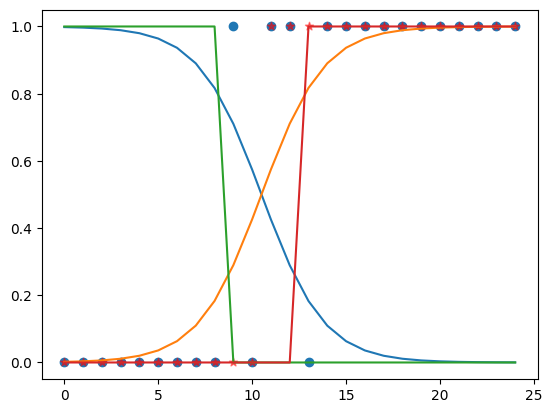

In [6]:
plt.scatter(x=x, y=y)
plt.scatter(x=x, y=y_pred, marker="*", alpha=0.5, c="red")
plt.plot(x, y_probabilities)
plt.plot(x, y_threshold)

# MultiLinear Regression  

- A list of weights and biases. One weight per variable. Then you tweak multiple variables.  



In [7]:
from sklearn.datasets import load_iris  
from sklearn.metrics import classification_report, confusion_matrix

iris = load_iris()
log_reg = LogisticRegression()
log_reg.fit(iris['data'], iris['target'])

C:\Users\shust\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
y_pred = log_reg.predict(iris['data'])
y_probabilities = log_reg.predict_proba(iris.data)

In [9]:
print(classification_report(iris['target'], y_pred))
print(confusion_matrix(iris['target'], y_pred )) # 4 predicted incorrectly...

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


In [10]:
log_reg2 = LogisticRegression()
log_reg2.fit(iris['data'][:, 2:], iris.target)

LogisticRegression()

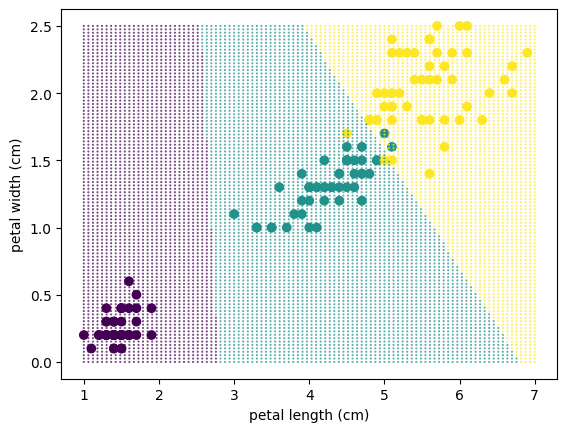

In [11]:
X_test, Y_test = np.meshgrid(np.linspace(1, 7, 100), np.linspace(0,2.5,100))
X_test = np.array([X_test.flatten(), Y_test.flatten()]).T

y_pred = log_reg2.predict(X_test)

plt.scatter(iris['data'][:,2], iris['data'][:,3], c=iris['target'])
plt.xlabel(iris['feature_names'][2])
plt.ylabel(iris['feature_names'][3])
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred, alpha=0.8, marker='.', s=1)
plt.show()

In [13]:
import numpy as np

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Given weights and bias
weights = np.array([-1.5, 1.8])
bias = 0.9

# Given data point
x = np.array([-0.8, -1.4])

# Compute the linear combination (z)
z = np.dot(weights, x) + bias

# Compute the probability
probability = sigmoid(z)

# Print the result
print("Predicted Probability:", probability)


Predicted Probability: 0.39651675013527377


In [22]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

#display(cancer)

log_reg = LogisticRegression(max_iter=200)
log_reg.fit(cancer['data'], cancer['target'])

X_train, X_test, y_train, y_test = train_test_split(
    cancer['data'], cancer['target'], test_size=0.15, random_state=55
)

y_pred = log_reg2.predict(X_test)

print(classification_report(cancer['target'], y_pred))
# print(confusion_matrix(cancer['target'], y_pred ))

C:\Users\shust\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: X has 30 features, but LogisticRegression is expecting 2 features as input.

In [23]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np

# Load dataset
cancer = load_breast_cancer()

# Split data into 85% training and 15% testing
X_train, X_test, y_train, y_test = train_test_split(
    cancer['data'], cancer['target'], test_size=0.15, random_state=55
)

# Initialize and train logistic regression model
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

# Make predictions on X_test
y_pred = log_reg.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.95      0.95        41
           1       0.96      0.96      0.96        45

    accuracy                           0.95        86
   macro avg       0.95      0.95      0.95        86
weighted avg       0.95      0.95      0.95        86

[[39  2]
 [ 2 43]]


C:\Users\shust\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
